In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os
# print(os.listdir())

In [4]:
data = pd.read_csv('C:\Work\Python\DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [5]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [7]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


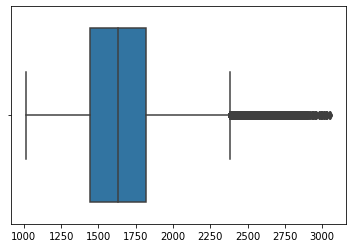

In [8]:
sns.boxplot(data.values)

In [9]:
# проверим пропуски
data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

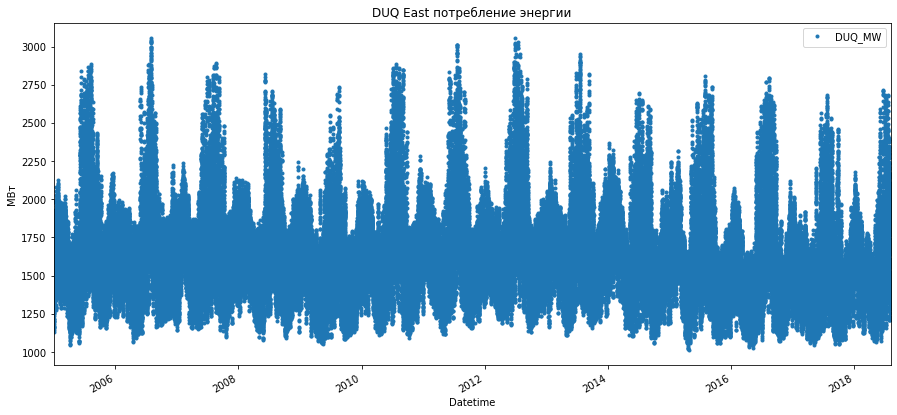

In [11]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ East потребление энергии' )
plt.ylabel ( 'МВт' )

In [37]:
data['date'] = data.index
data_2012 = data.loc[np.logical_and( np.logical_and( data['date'].dt.year == 2014, data['date'].dt.month > 1),data['date'].dt.day > 1  )]

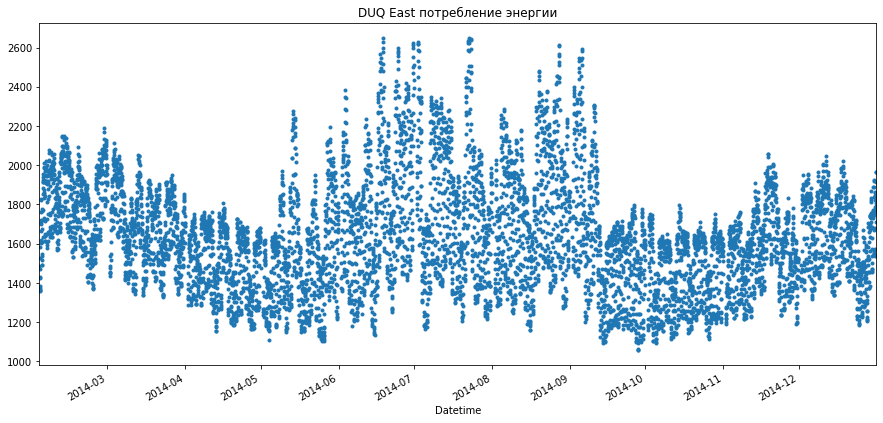

In [38]:
_ = data_2012['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ East потребление энергии' )

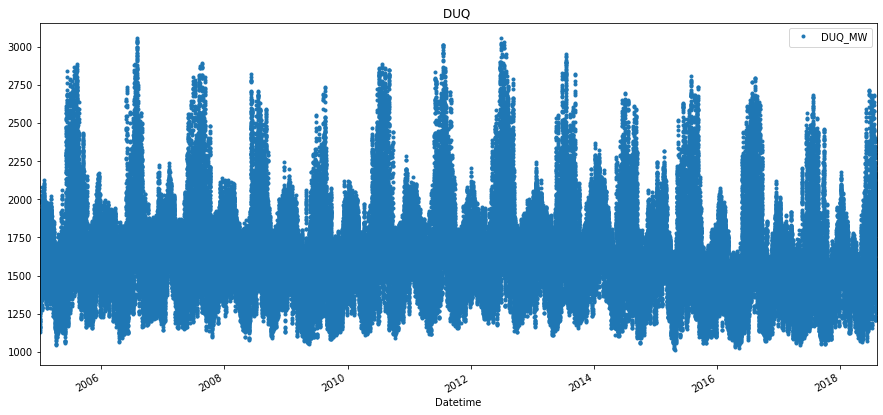

In [40]:
# Duquesne Light Co. (DUQ).
data_deok = pd.read_csv('C:\Work\Python\DUQ_hourly.csv', index_col=[0], parse_dates=[0])
_ = data_deok.plot( style='.', figsize=( 15, 7 ), title='DUQ ' )

## Brent 2010-2019

In [42]:
brent_data = pd.read_excel('C:\Work\Python\\brent_2010_2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [43]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
Значение    2667 non-null float64
dtypes: float64(1)
memory usage: 41.7 KB


In [44]:
brent_data.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


In [45]:
brent_data[brent_data['Значение'].isnull()].count()

Значение    0
dtype: int64

Text(0.5, 0, 't')

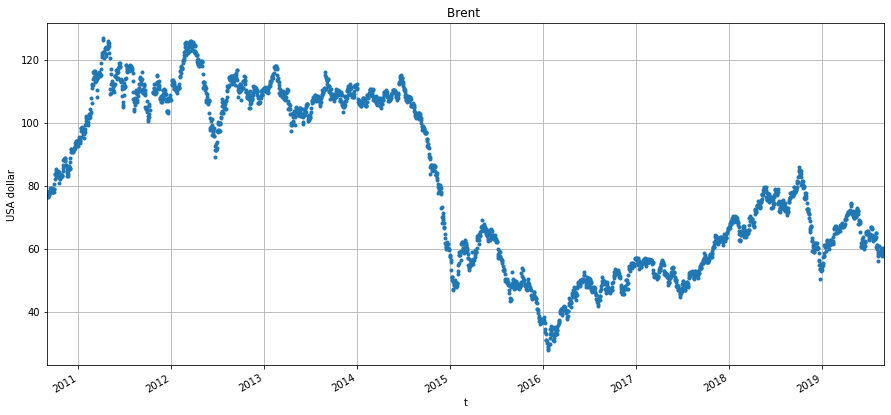

In [46]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.grid()
plt.xlabel('t')

### (ресемплинг) в представление по неделям , по месяцам.

In [77]:
brent_d = brent_data.resample("D").mean()
brent_w = brent_data.resample("W").mean()
brent_m = brent_data.resample("M").mean()
brent_y = brent_data.resample("Y").mean()

In [60]:
brent_d.head()

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63


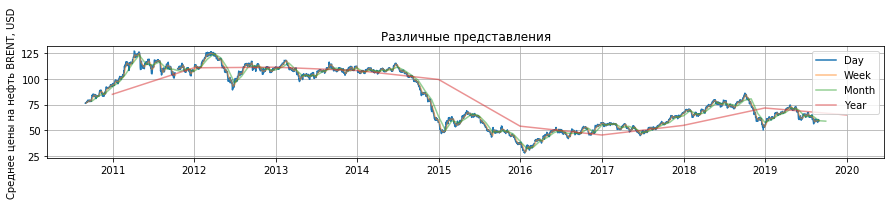

In [75]:
plt.figure( figsize=( 15, 7 ))
plt.subplot(3,1,1)

plt.ylabel('Среднее цены на нефть BRENT, USD')

plt.plot(brent_d.index.get_level_values('Дата'),brent_d, label='Day')
plt.plot(brent_w.index.get_level_values('Дата'),brent_w, label='Week', alpha = 0.5)
plt.plot(brent_m.index.get_level_values('Дата'),brent_m, label='Month', alpha = 0.5)
plt.plot(brent_y.index.get_level_values('Дата'),brent_y, label='Year', alpha = 0.5)
plt.title( 'Различные представления' )
plt.legend()
plt.grid()

#plt.subplot(3,1,2)

#plt.ylabel('Потребление энергии, МВт')
#plt.plot(test.index.get_level_values('Date'),X_test_pred_f, label='predict RF data' )
#plt.plot(test.index.get_level_values('Date'),y_test, label='test data', alpha = 0.5)
#plt.grid()
#plt.legend()

#plt.subplot(3,1,3)
#plt.xlabel('Время')
#plt.ylabel('Потребление энергии, МВт')
#plt.plot(test.index.get_level_values('Date'),X_test_pred_g, label='predict GB data' )
#plt.plot(test.index.get_level_values('Date'),y_test, label='test data', alpha = 0.5)
#plt.grid()
#plt.legend()

plt.show()

In [78]:
brent_d_std = brent_data.resample("D").std()
brent_w_std = brent_data.resample("W").std()
brent_m_std = brent_data.resample("M").std()
brent_y_std = brent_data.resample("Y").std()

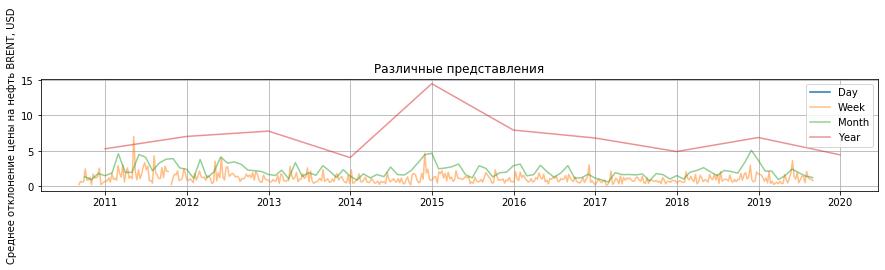

In [80]:
plt.figure( figsize=( 15, 7 ))
plt.subplot(3,1,1)

plt.ylabel('Cреднее отклонение цены на нефть BRENT, USD')

plt.plot(brent_d_std.index.get_level_values('Дата'),brent_d_std, label='Day')
plt.plot(brent_w_std.index.get_level_values('Дата'),brent_w_std, label='Week', alpha = 0.5)
plt.plot(brent_m_std.index.get_level_values('Дата'),brent_m_std, label='Month', alpha = 0.5)
plt.plot(brent_y_std.index.get_level_values('Дата'),brent_y_std, label='Year', alpha = 0.5)
plt.title( 'Различные представления' )
plt.legend()
plt.grid()

plt.show()
